# Contents

* Introduction
* Stage 1 : Data overview
    * 1.1 Goal
    * 1.2 Stages
    
* Stage 2 : Data preprocessing
    * 2.1 Import Library
    * 2.2 Load Data
    * 2.3 Data Quality Checking
    * 2.4 Data Cleansing
    
* Stage 3 : Exploratory Data Analysis (EDA).
        
* Stage 4 : Menguji Hipotesis & Analisis Data Statistik
    * 4.1  Bersihkan Outliers
    * 4.2  Uji Kenormalan Data
    * 4.3  Uji Variansi Data
    * 4.4  Uji Mannwhitneyu

* Stage 5 : Kesimpulan Umum


#  Introduction

Setiap kali kita melakukan penelitian, kita membutuhkan formula hipotesis yang akan kita uji. Terkadang kita bisa menerima hipotesis tersebut, dan juga kita dapat menolaknya. Pebisnis harus paham untuk membuat asumsi yang tepat.

Dalam projek kali ini, kita akan menemukan pola pada informasi yang tersedia, memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan, dan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan dari database. 

Terdapat data yang tersedia dari database, Yang mana data tersebut akan dilakukan uji hipotesis berikut :

   * Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu 

## Data Overview

Kamu bekerja sebagai seorang analyst untuk Zuber, sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago. Tugasmu adalah untuk menemukan pola pada informasi yang tersedia. Kamu ingin memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

Dengan menggunakan database, kamu akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan. 

### Goal

Tujuan Utama dalam Analisis Data ini adalah :

   1. Menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.
    
### Stages

Data yang berasal dari departemen periklanan disimpan dalam beberapa file :
   1. 'project_sql_result_01.csv'
   2. 'project_sql_result_04.csv'
   3. 'project_sql_result_07.csv'

Tidak terdapat informasi tentang kualitas data, sehingga kita harus eksplor data tersebut sebelum melakukan hipotesis.

Pertama, kita akan mengevaluasi kualitas data dan melihat apakah ada masalah yang signifikan. Kemudian, selama data preprocessing, kita akan menghitung masalah kritis.

Dalam projek ini terdiri dari empat tahapan : 

    1. Data overview
    2. Data preprocessing
    3. Exploratory Data Analysis (EDA)
    4. Analisis Data Statistik

## Data Preprocessing

### Import Library

In [1]:
# Import Library Data Processing
import pandas as pd, numpy as np
# Import Library Data Visualization
import matplotlib.pyplot as plt, seaborn as sns
# Import library Statistics
from scipy.stats import levene, shapiro, ttest_ind, mannwhitneyu

### Load Data

In [2]:
path1 = '/datasets/project_sql_result_01.csv'
data1 = pd.read_csv(path1)
data1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
path2 = '/datasets/project_sql_result_04.csv'
data2 = pd.read_csv(path2)
data2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [4]:
path3 = '/datasets/project_sql_result_07.csv'
data3 = pd.read_csv(path3)
data3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


### Data Quality Checking

In [5]:
# cek info data 1
data1.info()
print('\nmissing value: \n', data1.isnull().sum())
print('\nDuplikasi    :', data1.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

missing value: 
 company_name    0
trips_amount    0
dtype: int64

Duplikasi    : 0


In [6]:
# cek info data 2
data2.info()
print('\nmissing value: \n', data2.isnull().sum())
print('\nDuplikasi    :', data2.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

missing value: 
 dropoff_location_name    0
average_trips            0
dtype: int64

Duplikasi    : 0


In [7]:
# cek info data 3
data3.info()
print('\nmissing value: \n', data3.isnull().sum())
print('\nDuplikasi    :', data3.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

missing value: 
 start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Duplikasi    : 197


**Kesimpulan Sementara**
1. Tidak terdapat missing value dan duplikasi pada ketiga dataset 
2. Beberapa kolom memiliki tipe data int64 dan float64, untuk itu perlu dirubah menjadi int16 dan float16 agar tidak memakan memory banyak
3. Kolom start_ts pada dataset 3 memiliki tipe data yang salah, perlu dirubah ke tipe data datetime

### Data Cleansing

In [8]:
# Memastikan tipe data nya sudah benar
data1['trips_amount'] = data1['trips_amount'].astype('int16')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int16 
dtypes: int16(1), object(1)
memory usage: 768.0+ bytes


In [9]:
# Memastikan tipe data nya sudah benar
data2['average_trips'] = data2['average_trips'].astype('float16')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float16
dtypes: float16(1), object(1)
memory usage: 1.0+ KB


In [10]:
# Memastikan tipe data nya sudah benar
data3['duration_seconds'] = data3['duration_seconds'].astype('int16')
# Merubah tipe data kolom start_ts ke datetime
data3['start_ts'] = pd.to_datetime(data3['start_ts'])
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB


**Kesimpulan Sementara**
1. Beberapa kolom memiliki tipe data int64 dan float64, telah dirubah menjadi int16 dan float16 
2. Kolom start_ts pada dataset 3 memiliki tipe data yang salah telah dirubah ke tipe data datetime

## Exploratory Data Analysis (EDA)

In [11]:
# mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran
top_dropoff = data2.sort_values(by='average_trips', ascending=False)[:10]
top_dropoff

,dropoff_location_name,average_trips
0,Loop,10728.0
1,River North,9520.0
2,Streeterville,6664.0
3,West Loop,5164.0
4,O'Hare,2546.0
5,Lake View,2420.0
6,Grant Park,2068.0
7,Museum Campus,1510.0
8,Gold Coast,1364.0
9,Sheffield & DePaul,1260.0


In [12]:
# mengidentifikasi 10 perusahaan taksi dan jumlah perjalanannya
top_company = data1.sort_values(by='trips_amount', ascending=False)[:10]
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


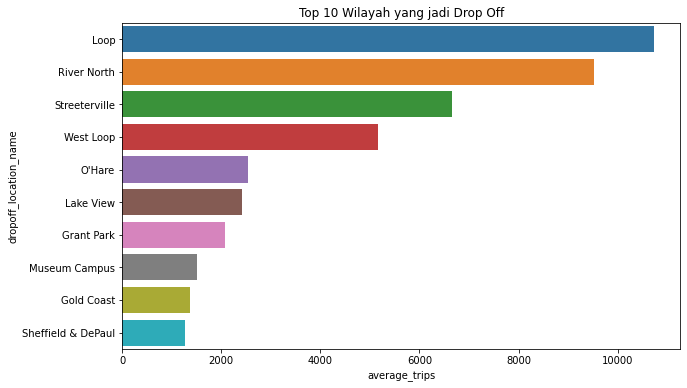

In [13]:
# Membuat grafik: perusahaan taksi dan jumlah perjalanannya, 
# 10 wilayah teratas berdasarkan jumlah pengantaran
plt.figure(figsize=(10,6))
sns.barplot(data=top_dropoff, x='average_trips', y='dropoff_location_name')
plt.title('Top 10 Wilayah yang jadi Drop Off')
plt.show()

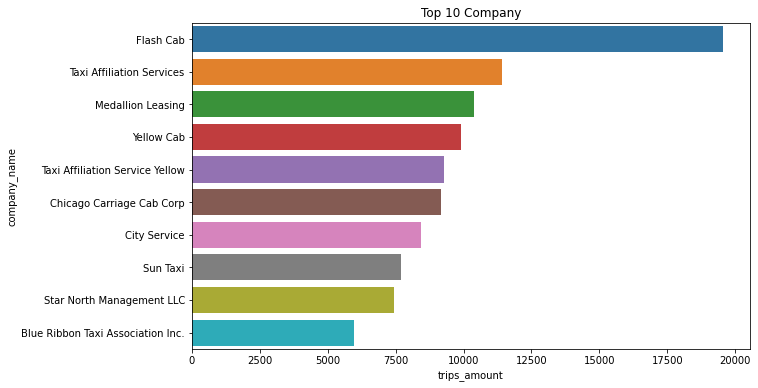

In [14]:
# Membuat grafik: 10 perusahaan taksi dan jumlah perjalanannya
plt.figure(figsize=(10, 6))
sns.barplot(data=top_company, x='trips_amount', y='company_name')
plt.title('Top 10 Company')
plt.show()

**Kesimpulan Sementara**
* Findings :
    * Wilayah Loop adalah wilayah yang paling banyak dijadikan tempat dropoff hingga lebih dari 10 ribu perjalanan
    * Perusahaan Flash Cab merupakan perusahaan yang paling banyak digunakan hingga lebih dari 19 ribu perjalanan
    * Top 10 Wilayah yang sering dijadikan dropoff memiliki jumlah total perjalanan lebih dari 1000 perjalanan
    * Top 10 Perusahaan memiliki jumlah total perjalanan lebih dari 5000 perjalanan
    
* insight :
    * Orang-orang lebih banyak percaya dan suka menggunakan layanan dari perusahaan Flash Cab
    * Wilayah Loop dan River North merupakan wilayah yang ramai penduduk, karena sering dijadikan tempat dropoff

## Menguji Hipotesis & Analisis Data Statistik

Kriteria yang saya gunakan untuk menguji hipotesis adalah uji variansi, dan uji distribusi kenormalan, Metode perbandinganya menggunakan mannwhitneyu untuk metode two independent test.

Saya juga menggunakan uji levence untuk mengetahui apakah variansi nya dari distribusi yg sama atau tidak, kalau menggunakan ttest bisa jadi p-valuenya terdapat perbedaan yang signifikan.

In [15]:
# cek dataset
data3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In [16]:
# Pastikan semua hari adalah sabtu semua
data3['start_ts'].dt.weekday.unique()

array([5])

* Ternyata data kita semuanya adalah hari sabtu

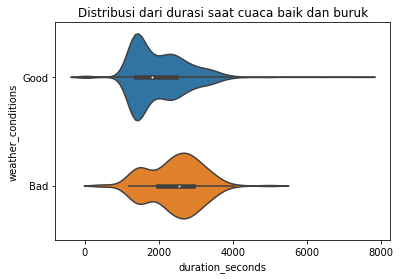

In [17]:
# Cek Distribusi dari durasi saat cuaca baik dan buruk
plt.title('Distribusi dari durasi saat cuaca baik dan buruk')
sns.violinplot(data=data3, x='duration_seconds', y='weather_conditions')
plt.show()

* Distribusi dari durasi saat cuaca baik dan buruk sekilas persebarannya terlihat merata, akan tetapi terdapat outliers yang berlebihan pada kedua kondisi cuaca tersebut

### Bersihkan Outliers

In [18]:
# Pisahkan 2 kondisi tersebut
good = data3.loc[data3['weather_conditions']== 'Good', 'duration_seconds']
bad = data3.loc[data3['weather_conditions']== 'Bad', 'duration_seconds']

In [19]:
# buat function untuk membersihkan outlier
def remove_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    output = series[(series > lower_bound) & (series < upper_bound)]
    return output

In [20]:
# Bersihkan data dari outlier
good = remove_outliers(good)
bad = remove_outliers(bad)

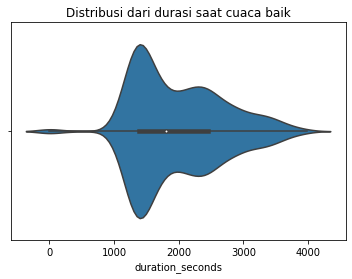

In [21]:
# cek grafik nya
plt.title('Distribusi dari durasi saat cuaca baik')
sns.violinplot(x=good)
plt.show()

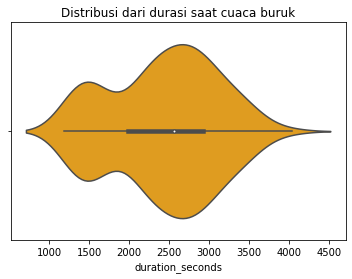

In [22]:
# cek grafik nya
plt.title('Distribusi dari durasi saat cuaca buruk')
sns.violinplot(x=bad,  color='orange')
plt.show()

* Outliers telah di bersihkan dari dua kondisi tersebut, sehingga distribusi nya lebih rapi dan merata

### Uji Kenormalan Data

In [23]:
# Bikin function uji kenormalan
def normality_test(series, alpha=0.05):
    p_value_shapiro = shapiro(series).pvalue
    print(f'P-Value: {p_value_shapiro}')
    print(f'Alpha  : {alpha}')
    if p_value_shapiro >= alpha:
        print('H0 Diterima: Distribusi data tersebut adalah normal')
    else:
        print('H1 Diterima: Distribusi data tersebut adalah tidak normal')

In [24]:
# cek kenormalan pada kondisi good
normality_test(good)

P-Value: 8.395970071377549e-19
Alpha  : 0.05
H1 Diterima: Distribusi data tersebut adalah tidak normal


In [25]:
# cek kenormalan pada kondisi bad
normality_test(bad)

P-Value: 0.0002595653641037643
Alpha  : 0.05
H1 Diterima: Distribusi data tersebut adalah tidak normal


* Berdasarkan uji kenormalan data diatas, Distribusi data Good dan Bad merupakan distribusi tidak normal.

### Uji Variansi Data

In [26]:
# Bikin function uji variansi
def levene_variance(series1, series2, alpha=0.05):
    p_value_levene = levene(series1, series2).pvalue
    print(f'P-Value: {p_value_levene}')
    print(f'Alpha  : {alpha}')
    if p_value_levene >= alpha:
        print('H0 Diterima: Kedua data memiliki variansi yang sama')
    else:
        print('H1 Diterima: Kedua data memiliki variansi yang berbeda')

In [27]:
# cek variansi
levene_variance(good, bad)

P-Value: 0.3563611473946102
Alpha  : 0.05
H0 Diterima: Kedua data memiliki variansi yang sama


* Berdasarkan uji variansi diatas, Data good dan bad memiliki P-Value 0.35 dan hal tersebut lebih besar dari Alpha yang bernilai 0.05, sehingga variansi pada data good dan bad memiliki variansi yang sama
* Kedua data tersebut memiliki variansi yang mirip, meskipun distribusi nya mirip tetapi secara statistik keduanya berbeda, karena median data di good lebih rendah daripada di bad

### Uji Mannwhitneyu

In [28]:
# Bikin function uji mannwhitneyu
def two_independent_test(series1, series2, alpha=0.05):
    p_value = mannwhitneyu(series1, series2).pvalue
    print(f'P-Value: {p_value}')
    print(f'Alpha  : {alpha}')
    if p_value >= alpha:
        print('H0 Diterima: Rata-rata dari kedua data sama')
    else:
        print('H1 Diterima: Rata-rata dari kedua data berbeda')

In [29]:
# cek mannwhitneyu
two_independent_test(good,bad)

P-Value: 3.4547468378060904e-15
Alpha  : 0.05
H1 Diterima: Rata-rata dari kedua data berbeda


* Berdasarkan uji mannwhitneyu diatas, Data good dan bad memiliki P-Value 3.45 dan hal tersebut lebih besar dari Alpha yang bernilai 0.05, sehingga rata-rata dari kedua data tersebut berbeda

In [30]:
# Setelah diketahui terdapat perbedaan durasi yang signifikan, kita lihat seberapa jauh perbedaannya
print(f'Average Duration Good: {int(good.mean())} seconds')
print(f'Median Duration Good : {int(good.median())} seconds')

print(f'Average Duration Bad : {int(bad.mean())} seconds')
print(f'Median Duration Bad  : {int(bad.median())} seconds')

Average Duration Good: 1976 seconds
Median Duration Good : 1800 seconds
Average Duration Bad : 2434 seconds
Median Duration Bad  : 2560 seconds


**Kesimpulan**
* findings :
    * Rata-rata durasi pada saat kondisi cuaca baik adalah selama 1976 detik
    * Rata-rata durasi pada saat kondisi cuaca buruk adalah selama 2434 detik
    * Median durasi pada saat kondisi cuaca baik adalah selama 1800 detik
    * Median durasi pada saat kondisi cuaca baik adalah selama 2560 detik
* insight :
    * Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu, perubahannya cukup siginifikan, karena Jika cuacanya sedang baik maka perjalanan akan lebih cepat, kalau cuacanya sedang buruk perjalanan akan lebih lama

## Kesimpulan Umum

* A. Data Preprocessing

     Data Mentah :
    1. Tidak terdapat missing value dan duplikasi pada ketiga dataset 
    2. Beberapa kolom memiliki tipe data int64 dan float64, untuk itu perlu dirubah menjadi int16 dan float16 agar tidak memakan memory banyak
    3. Kolom start_ts pada dataset 3 memiliki tipe data yang salah, perlu dirubah ke tipe data datetime
    
    Setelah Datah dibersihkan :
    1. Beberapa kolom memiliki tipe data int64 dan float64, telah dirubah menjadi int16 dan float16 
    2. Kolom start_ts pada dataset 3 memiliki tipe data yang salah telah dirubah ke tipe data datetime
    
    
* B. Exploratory Data Analysis (EDA)
    
    * Findings :
        * Wilayah Loop adalah wilayah yang paling banyak dijadikan tempat dropoff hingga lebih dari 10 ribu perjalanan
        * Perusahaan Flash Cab merupakan perusahaan yang paling banyak digunakan hingga lebih dari 19 ribu perjalanan
        * Top 10 Wilayah yang sering dijadikan dropoff memiliki jumlah total perjalanan lebih dari 1000 perjalanan
        * Top 10 Perusahaan memiliki jumlah total perjalanan lebih dari 5000 perjalanan
    
    * insight :
        * Orang-orang lebih banyak percaya dan suka menggunakan layanan dari perusahaan Flash Cab
        * Wilayah Loop dan River North merupakan wilayah yang ramai penduduk, karena sering dijadikan tempat dropoff
    
    
* C. Menguji Hipotesis & Analisis Data Statistik 

    * Ternyata data kita semuanya adalah hari sabtu
    * Distribusi dari durasi saat cuaca baik dan buruk sekilas persebarannya terlihat merata, akan tetapi terdapat outliers yang berlebihan pada kedua kondisi cuaca tersebut

    * 4.1 Bersihkan Outliers
        * Outliers telah di bersihkan dari dua kondisi tersebut, sehingga distribusi nya lebih rapi dan merata

    * 4.2 Uji Kenormalan Data
        * Berdasarkan uji kenormalan data diatas, Distribusi data Good dan Bad merupakan distribusi tidak normal.

    * 4.3 Uji Variansi Data
        * Berdasarkan uji variansi diatas, Data good dan bad memiliki P-Value 0.35 dan hal tersebut lebih besar dari Alpha yang bernilai 0.05, sehingga variansi pada data good dan bad memiliki variansi yang sama
        * Kedua data tersebut memiliki variansi yang mirip, meskipun distribusi nya mirip tetapi secara statistik keduanya berbeda, karena median data di good lebih rendah daripada di bad

    * 4.4 Uji Mannwhitneyu
        * Berdasarkan uji mannwhitneyu diatas, Data good dan bad memiliki P-Value 3.45 dan hal tersebut lebih besar dari Alpha yang bernilai 0.05, sehingga rata-rata dari kedua data tersebut berbeda
        * findings :
            * Rata-rata durasi pada saat kondisi cuaca baik adalah selama 1976 detik
            * Rata-rata durasi pada saat kondisi cuaca buruk adalah selama 2434 detik
            * Median durasi pada saat kondisi cuaca baik adalah selama 1800 detik
            * Median durasi pada saat kondisi cuaca baik adalah selama 2560 detik
        * insight :
            * Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu, perubahannya cukup siginifikan, karena Jika cuacanya sedang baik maka perjalanan akan lebih cepat, kalau cuacanya sedang buruk perjalanan akan lebih lama